# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Importing the dataset

In [2]:
dataset = pd.read_csv('C:\\Users\\YOGMAYA\\Desktop\\Datasset\\Mall_Customers.csv')
x = dataset.iloc[ : , [3,4]].values

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Using the Elbow Method to find the optimal number of clusters

C:\Users\YOGMAYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YOGMAYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YOGMAYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YOGMAYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

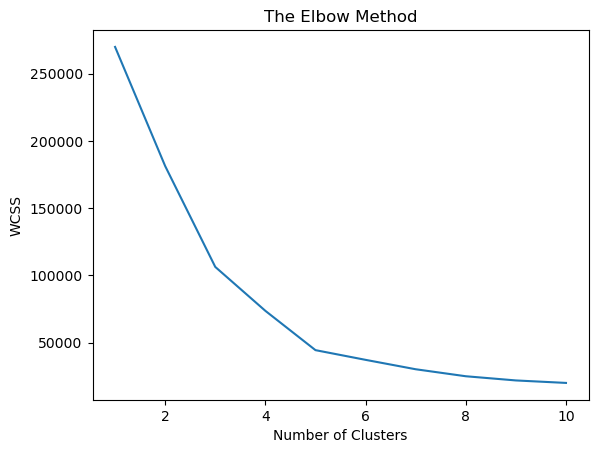

In [8]:
from sklearn.cluster import KMeans
wcss = []
#inertia
#Within Clusters Sum of Squares
#It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25036.417604033988,
 21916.79478984373,
 20072.070939404002]

In [15]:
kmeans

KMeans(n_clusters=5, random_state=42)

# Training the K-Means model on the dataset

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++' , random_state = 42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\YOGMAYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YOGMAYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualising the Clusters

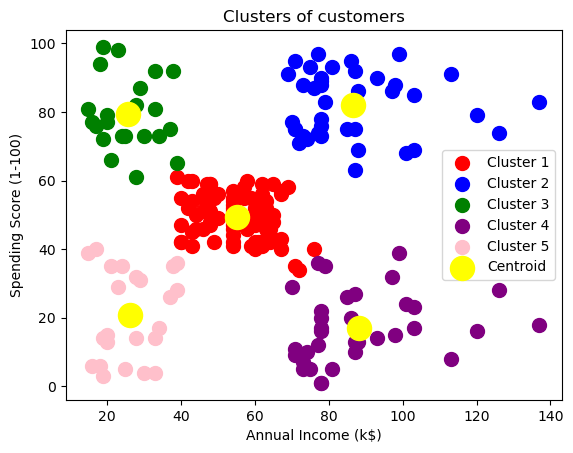

In [19]:
plt.scatter( x[y_kmeans == 0, 0] , x[y_kmeans == 0, 1] , s = 100, c = 'red' , label = 'Cluster 1')
plt.scatter( x[y_kmeans == 1, 0] , x[y_kmeans == 1, 1] , s = 100, c = 'blue' , label = 'Cluster 2')
plt.scatter( x[y_kmeans == 2, 0] , x[y_kmeans == 2, 1] , s = 100, c = 'green' , label = 'Cluster 3')
plt.scatter( x[y_kmeans == 3, 0] , x[y_kmeans == 3, 1] , s = 100, c = 'purple' , label = 'Cluster 4')
plt.scatter( x[y_kmeans == 4, 0] , x[y_kmeans == 4, 1] , s = 100, c = 'pink' , label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[ : , 0] , kmeans.cluster_centers_[ : , 1] , s = 300, c= 'yellow' , label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()